In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from collections import deque
import seaborn as sns

from matplotlib import collections  as mc

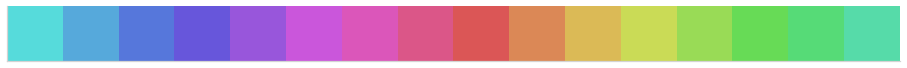

In [ ]:
sns.set(font='serif',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'axes.grid':False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})
plt.rcParams["figure.figsize"] = (16,16)

colors = sns.hls_palette(16, h=0.5)
sns.palplot(colors)
sns.set_palette(colors)

In [ ]:

def sum1(l):
    s = sum(l)
    return [i/s for i in l]
 
class Interpreter():

    def __init__(self,  funcs, pos=None, angle=0):
        if pos is None:
            pos = (0,0)
        self.pos = pos
        self.angle = angle
        #self.stack = deque()
        self.stack = []
        self.colors =[]
        self.color = None
        self.stack_angle = []
        self.state = None
        self.funcs = funcs
        self.last_pos = None
        self.lines = []
        self.dummy = lambda x: x


    def process(self, string):
        for s in string:
            self.funcs.get(s, self.dummy)(self)

    def graph(self, colors=None, alpha=1):
        lc = mc.LineCollection(self.lines, linewidths=1, colors=colors,  alpha=alpha)
        fig, ax = pl.subplots()
        ax.add_collection(lc)
        ax.autoscale()
        ax.margins(0.1)
     
    @classmethod
    def make(cls, func, /, *args, **keywords):
        new = lambda *fargs, **fkeywords: func(*args, *fargs, **keywords, **fkeywords)
        new.func = func
        new.args = args
        new.keywords = keywords
        return new


class System():

    def __init__(self, rules:list, start:str="", weights = None):
        self.weights = weights
        self.rules = rules
        self.state = start
        self.start = start

    def generate(self, iters=1, ignore=True):
        for i in range(iters):
            rules = np.random.choice(self.rules, p=self.weights)
            new_state = []
            for s in self.state:
                new_state.append(rules.get(s,s))
            self.state = "".join(new_state)

    def gen_str(self, iters=1):
        s = System(self.rules, self.start, self.weights)
        s.generate(iters)
        return s.state
     

        



In [ ]:
system = System([{"x":"x+yf",
                  "y":"fx-y",
                  "+":"+",
                  "f":"f",
                  "-":"-"
                  }], "fx")
system.generate(11)
system.state

'fx+yf+fx-yf+fx+yf-fx-yf+fx+yf+fx-yf-fx+yf-fx-yf+fx+yf+fx-yf+fx+yf-fx-yf-fx+yf+fx-yf-fx+yf-fx-yf+fx+yf+fx-yf+fx+yf-fx-yf+fx+yf+fx-yf-fx+yf-fx-yf-fx+yf+fx-yf+fx+yf-fx-yf-fx+yf+fx-yf-fx+yf-fx-yf+fx+yf+fx-yf+fx+yf-fx-yf+fx+yf+fx-yf-fx+yf-fx-yf+fx+yf+fx-yf+fx+yf-fx-yf-fx+yf+fx-yf-fx+yf-fx-yf-fx+yf+fx-yf+fx+yf-fx-yf+fx+yf+fx-yf-fx+yf-fx-yf-fx+yf+fx-yf+fx+yf-fx-yf-fx+yf+fx-yf-fx+yf-fx-yf+fx+yf+fx-yf+fx+yf-fx-yf+fx+yf+fx-yf-fx+yf-fx-yf+fx+yf+fx-yf+fx+yf-fx-yf-fx+yf+fx-yf-fx+yf-fx-yf+fx+yf+fx-yf+fx+yf-fx-yf+fx+yf+fx-yf-fx+yf-fx-yf-fx+yf+fx-yf+fx+yf-fx-yf-fx+yf+fx-yf-fx+yf-fx-yf-fx+yf+fx-yf+fx+yf-fx-yf+fx+yf+fx-yf-fx+yf-fx-yf+fx+yf+fx-yf+fx+yf-fx-yf-fx+yf+fx-yf-fx+yf-fx-yf-fx+yf+fx-yf+fx+yf-fx-yf+fx+yf+fx-yf-fx+yf-fx-yf-fx+yf+fx-yf+fx+yf-fx-yf-fx+yf+fx-yf-fx+yf-fx-yf+fx+yf+fx-yf+fx+yf-fx-yf+fx+yf+fx-yf-fx+yf-fx-yf+fx+yf+fx-yf+fx+yf-fx-yf-fx+yf+fx-yf-fx+yf-fx-yf+fx+yf+fx-yf+fx+yf-fx-yf+fx+yf+fx-yf-fx+yf-fx-yf-fx+yf+fx-yf+fx+yf-fx-yf-fx+yf+fx-yf-fx+yf-fx-yf+fx+yf+fx-yf+fx+yf-fx-yf+fx+yf+fx-yf-fx+

In [ ]:
def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def minus(interpreter, sigma=90):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=90):
    interpreter.angle = (interpreter.angle-sigma)%360
    


interpreter = Interpreter({"f":f, "-":minus, "+":plus})

In [ ]:
interpreter.process(system.state)

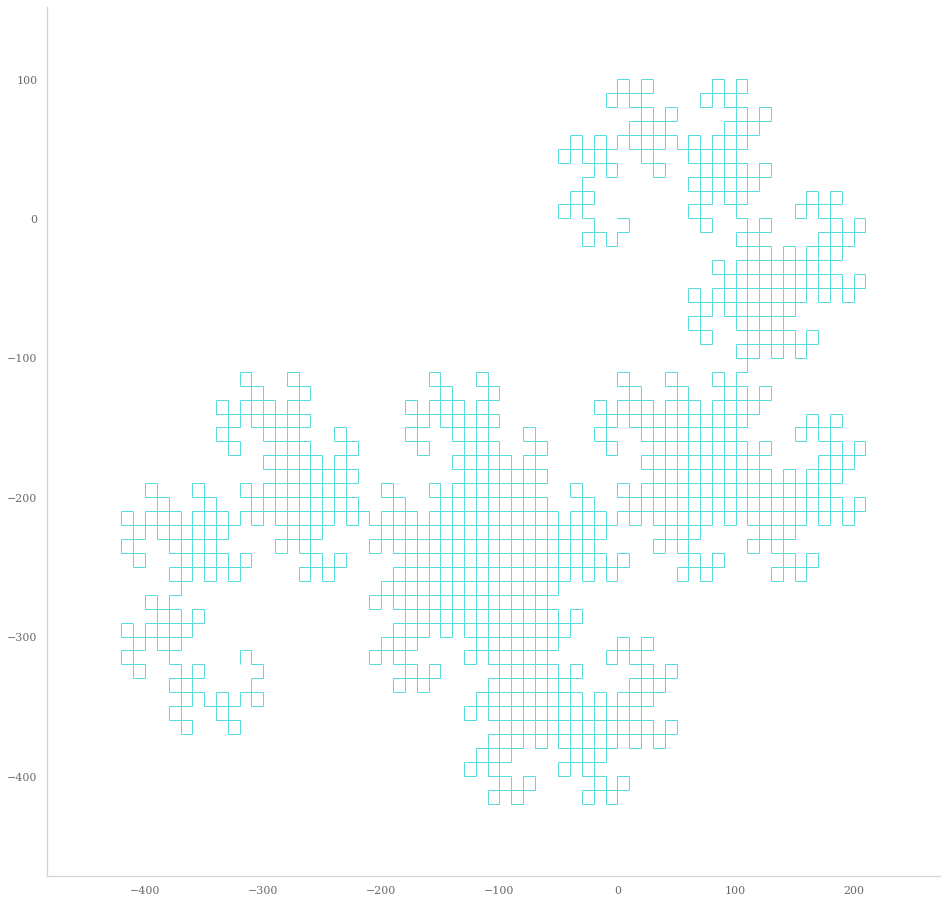

In [ ]:
interpreter.graph()

2446676


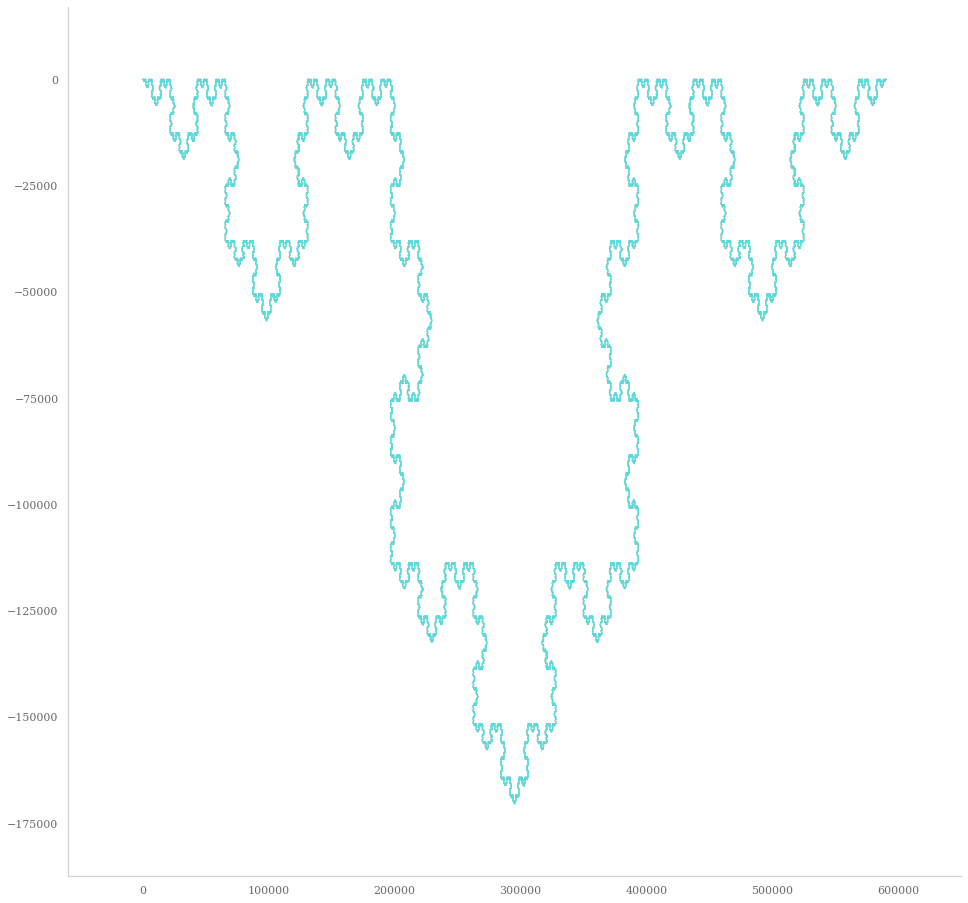

In [ ]:
system = System([{"f":"f+f--f+f",
                  }], "f")

system.generate(10)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def minus(interpreter, sigma=60):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=60):
    interpreter.angle = (interpreter.angle-sigma)%360
    


interpreter = Interpreter({"f":f, "-":minus, "+":plus})
interpreter.process(system.state)
interpreter.graph()

16007


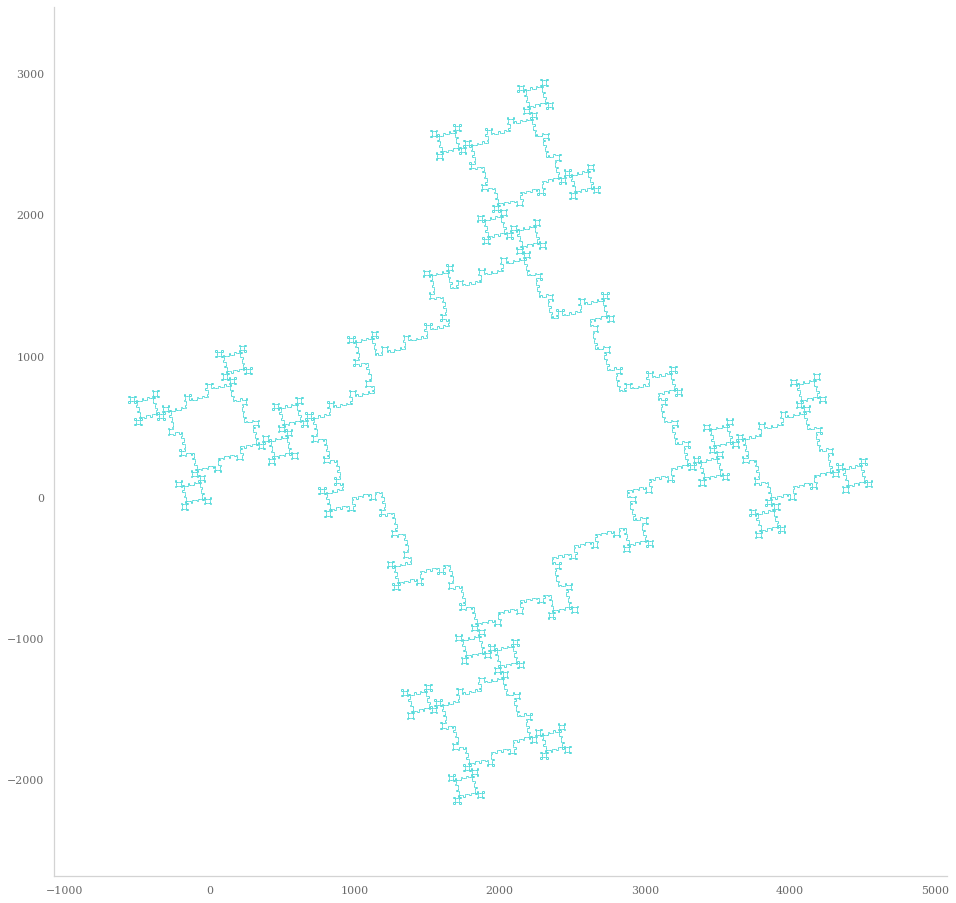

In [ ]:
system = System([{"f":"f+f+f-fff-f",
                  }], "f+f+f+f")

system.generate(4)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def minus(interpreter, sigma=90):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=90):
    interpreter.angle = (interpreter.angle-sigma)%360
    


interpreter = Interpreter({"f":f, "-":minus, "+":plus})
interpreter.process(system.state)
interpreter.graph()

16007


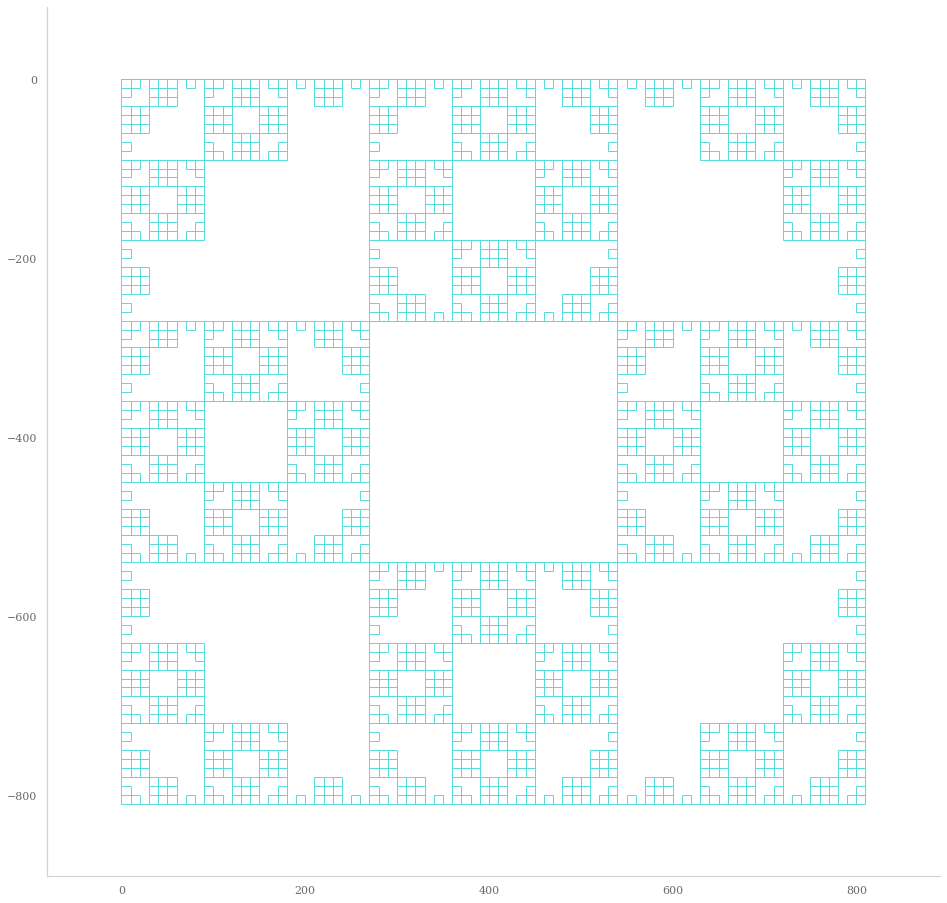

In [ ]:
system = System([{"f":"ff+f+f+f+ff",
                  }], "f+f+f+f")

system.generate(4)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def minus(interpreter, sigma=90):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=90):
    interpreter.angle = (interpreter.angle-sigma)%360
    


interpreter = Interpreter({"f":f, "-":minus, "+":plus})
interpreter.process(system.state)
interpreter.graph()

243419


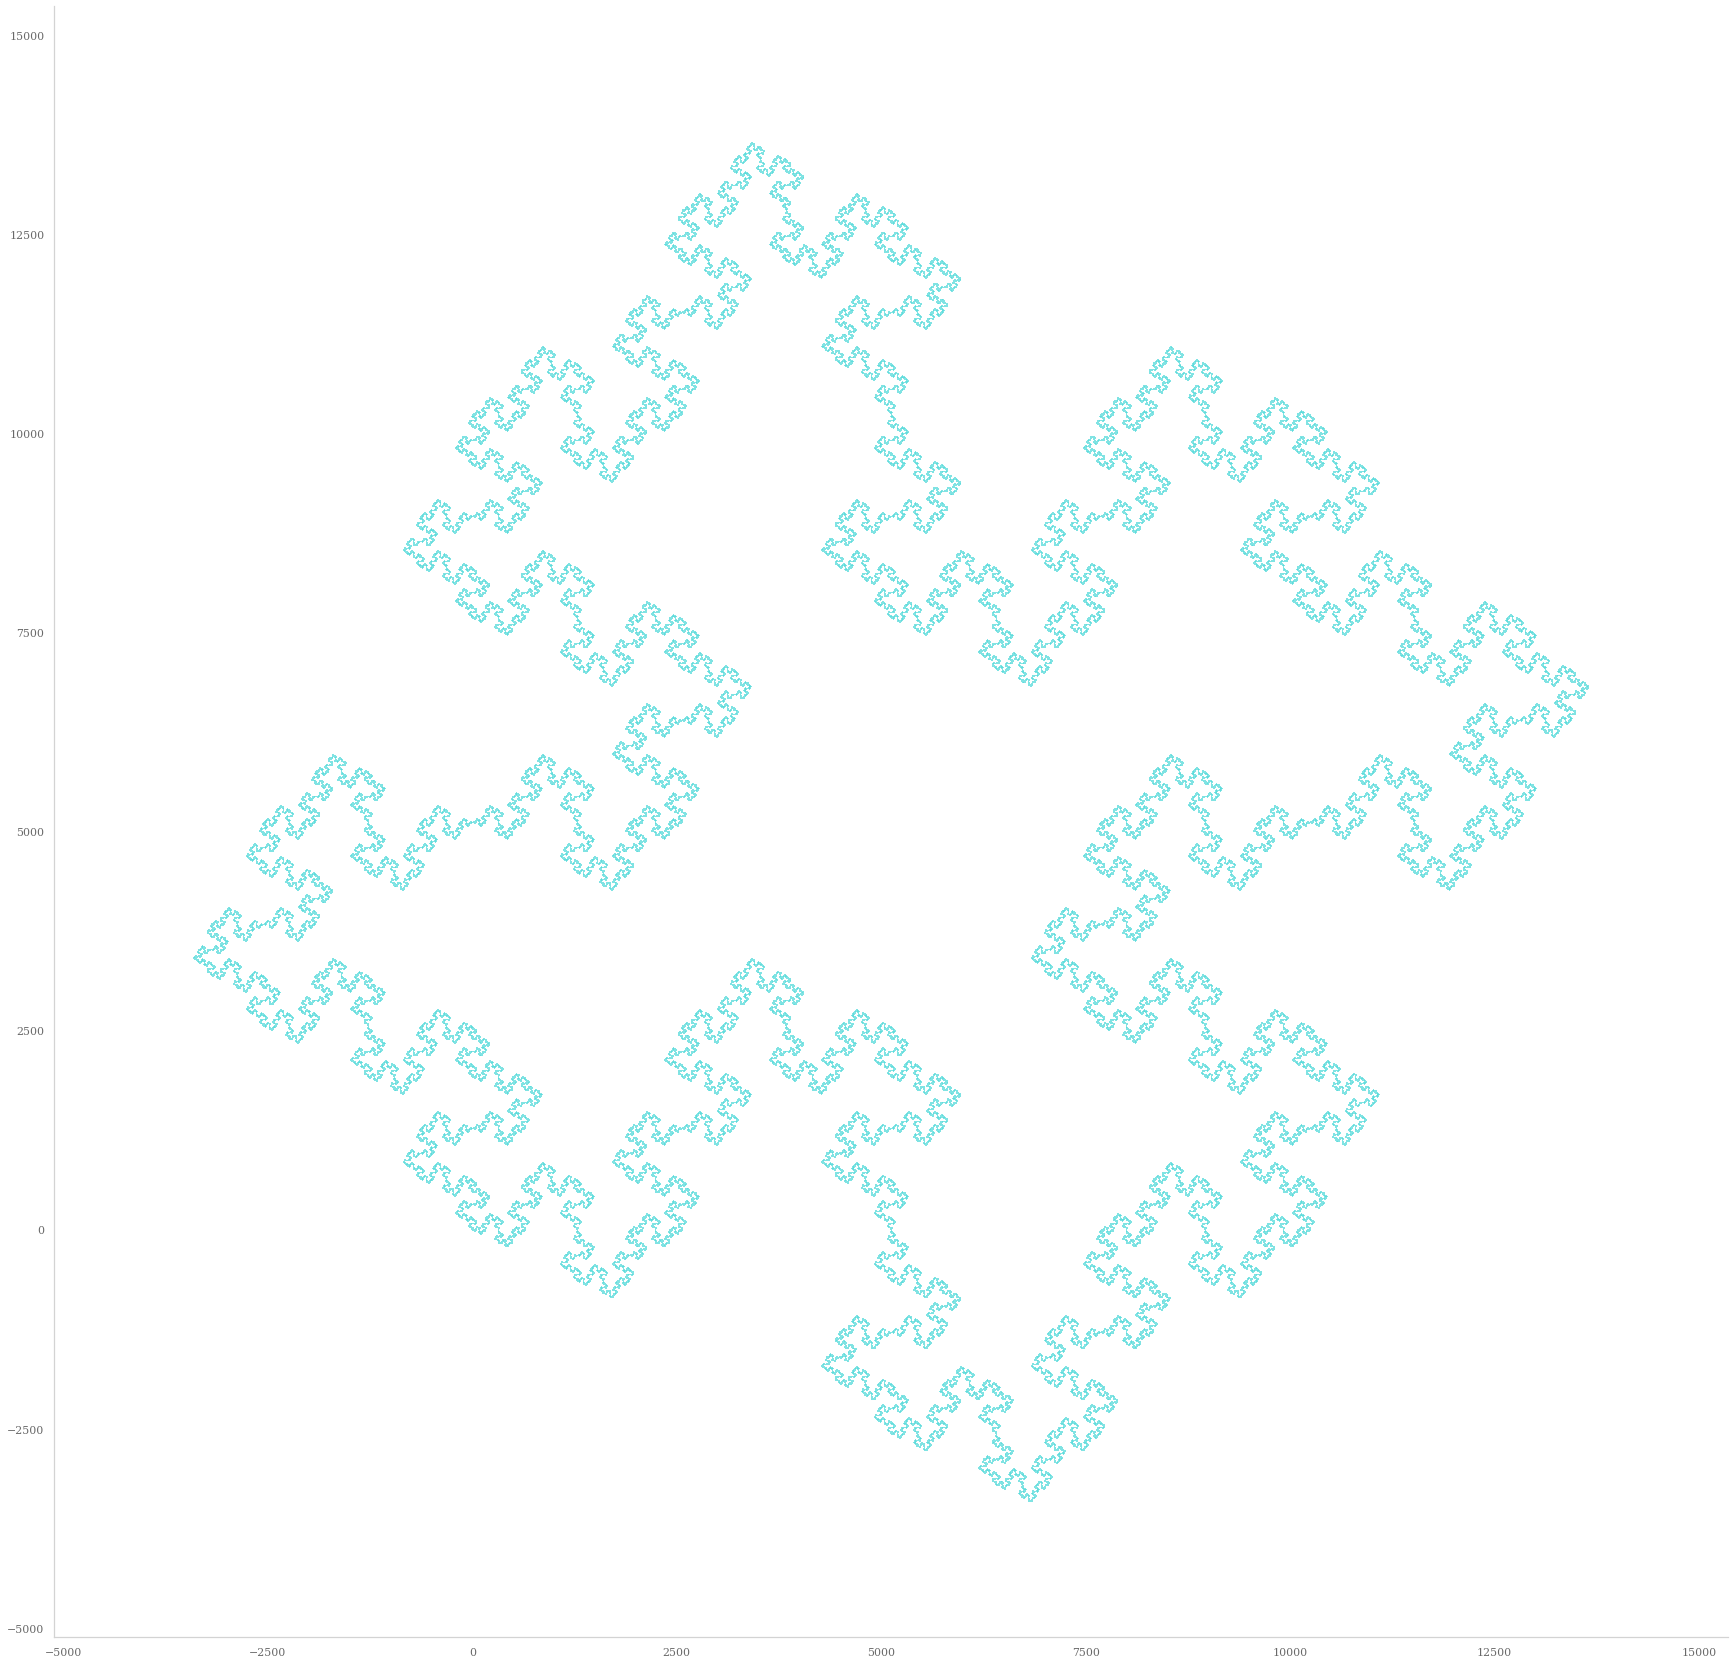

In [ ]:
system = System([{"f":"f-f+f+ff-f-f+f",
                  }], "f-f-f-f")

system.generate(5)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def minus(interpreter, sigma=90):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=90):
    interpreter.angle = (interpreter.angle-sigma)%360
    


interpreter = Interpreter({"f":f, "-":minus, "+":plus})
interpreter.process(system.state)
interpreter.graph()

3645


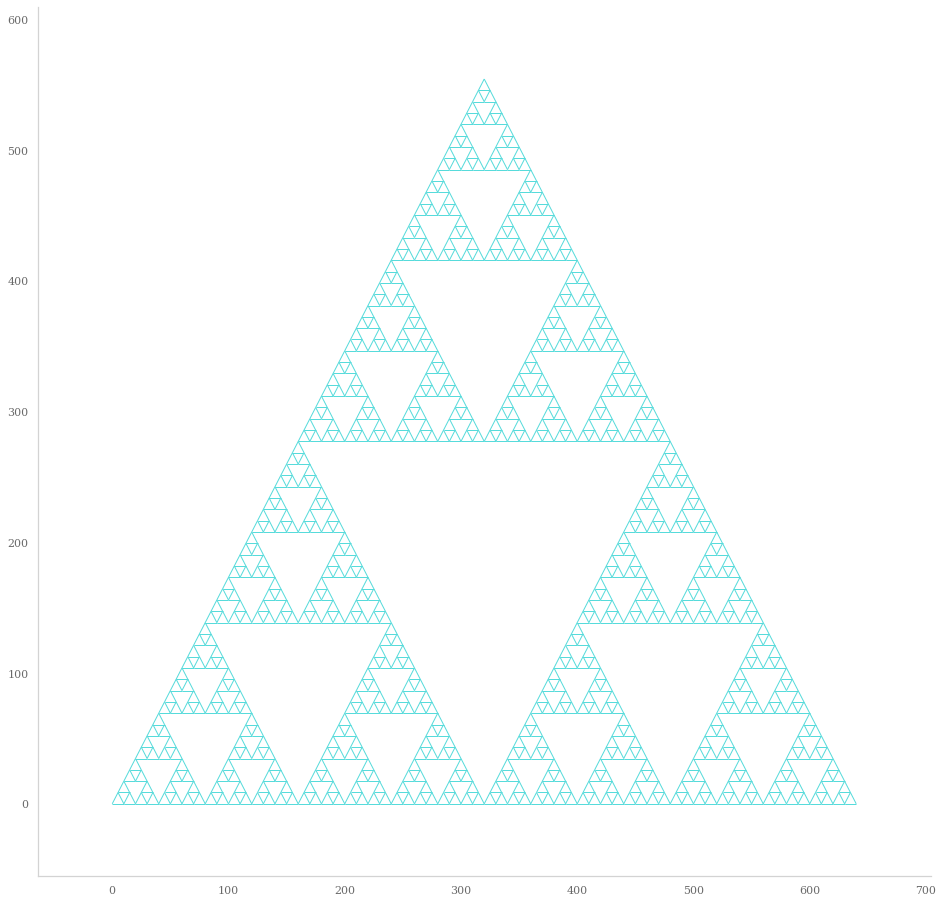

In [ ]:
system = System([{"f":"f-g+f+g-f",
                  "g":"gg"}], "f-g-g")

system.generate(6)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def minus(interpreter, sigma=120):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=120):
    interpreter.angle = (interpreter.angle-sigma)%360
    


interpreter = Interpreter({"f":f, "-":minus, "+":plus,"g":f})
interpreter.process(system.state)
interpreter.graph()

50419
f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f]f[+f]f[-f[+f][-f]]f[-f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f][-f[+f]f[-f[+f][-f]]f]]f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f]f[+f]f[-f[+f][-f]]f[-f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f][-f[+f]f[-f[+f][-f]]f]]f[+f]f[-f[+f][-f]]f]f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f]f[+f]f[-f[+f][-f]]f[-f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f][-f[+f]f[-f[+f][-f]]f]]f[+f]f[-f[+f][-f]]f[-f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f]f[+f]f[-f[+f][-f]]f[-f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f][-f[+f]f[-f[+f][-f]]f]]f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f]f[+f]f[-f[+f][-f]]f[-f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f][-f[+f]f[-f[+f][-f]]f]]f[+f]f[-f[+f][-f]]f][-f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f]f[+f]f[-f[+f][-f]]f[-f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f][-f[+f]f[-f[+f][-f]]f]]f[+f]f[-f[+f][-f]]f]]f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f]f[+f]f[-f[+f][-f]]f[-f[+f]f[-f[+f][-f]]f[+f[+f]f[-f[+f][-f]]f][-f[+f]f[

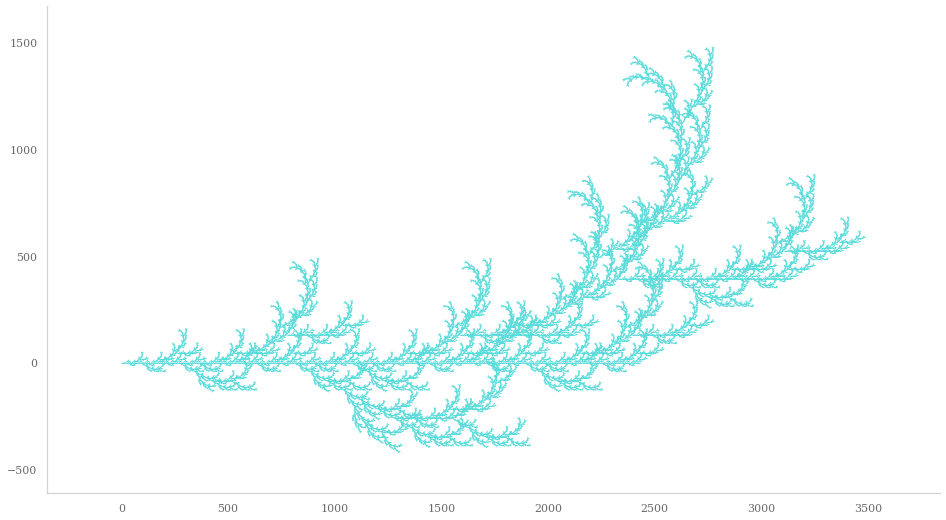

In [ ]:
system = System([{"f":"f[+f]f[-f[+f][-f]]f",
                  }], "f")

system.generate(5)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def minus(interpreter, sigma=29):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=29):
    interpreter.angle = (interpreter.angle-sigma)%360


def save(interpreter):
    interpreter.stack.append(interpreter.pos)
    interpreter.stack_angle.append(interpreter.angle)

def load(interpreter):

    interpreter.pos = interpreter.stack.pop(-1)
    interpreter.angle = interpreter.stack_angle.pop(-1)

def save2(interpreter):
  
    interpreter.last_pos = interpreter.pos

def load2(interpreter):
    
    interpreter.pos = interpreter.last_pos
print(system.state[:2000])

interpreter = Interpreter({"f":f, "-":minus, "+":plus,"g":f, "[":save, "]":load})
interpreter.process(system.state)
interpreter.graph()
plt.gca().set_aspect('equal')

139966


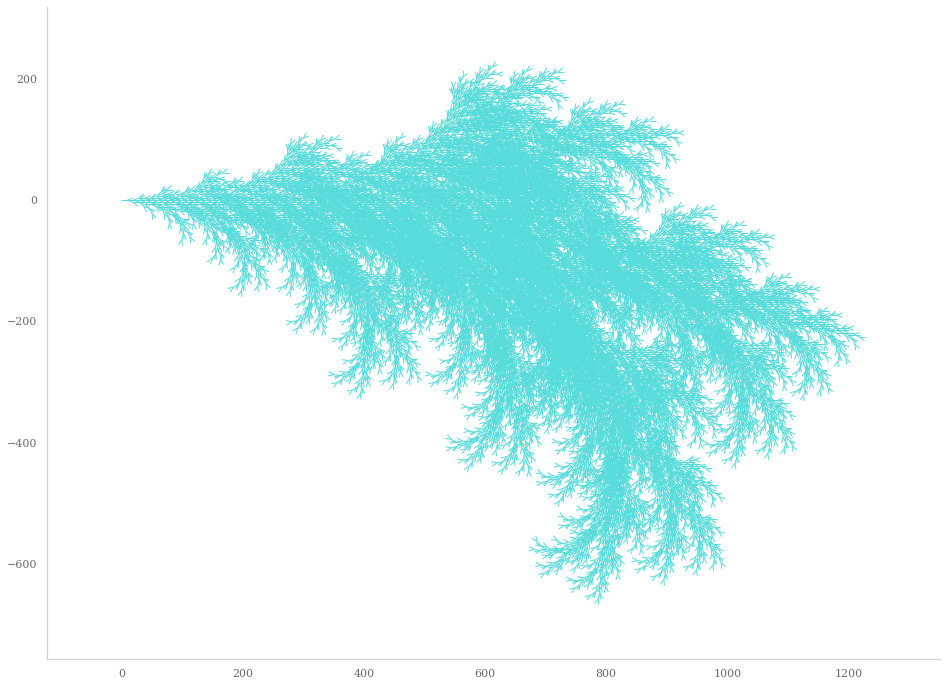

In [ ]:
system = System([{"f":"f[+f[+f]-f][-f]f",
                  }], "f")

system.generate(6)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def minus(interpreter, sigma=21):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=21):
    interpreter.angle = (interpreter.angle-sigma)%360

def save(interpreter):
    interpreter.stack.append(interpreter.pos)
    interpreter.stack_angle.append(interpreter.angle)

def load(interpreter):

    interpreter.pos = interpreter.stack.pop(-1)
    interpreter.angle = interpreter.stack_angle.pop(-1)


interpreter = Interpreter({"f":f, "-":minus, "+":plus,"g":f, "[":save, "]":load})
interpreter.process(system.state)
interpreter.graph()
plt.gca().set_aspect('equal')

711532


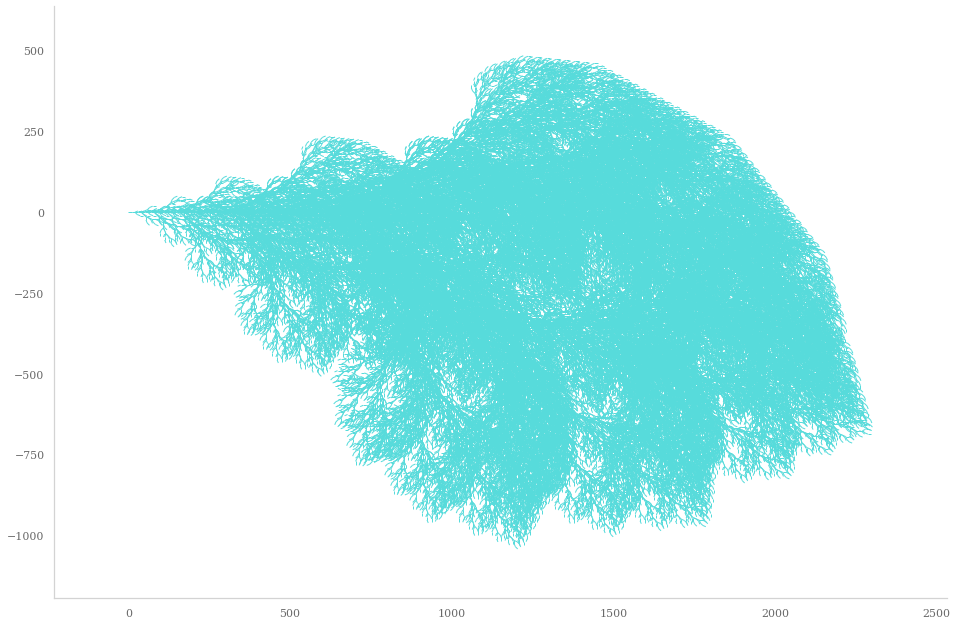

In [ ]:
system = System([{"f":"ff+[+f-f-f]-[-f+f+f]",
                  }], "f")

system.generate(6)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def minus(interpreter, sigma=22.5):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=22.5):
    interpreter.angle = (interpreter.angle-sigma)%360

def save(interpreter):
    interpreter.stack.append(interpreter.pos)
    interpreter.stack_angle.append(interpreter.angle)

def load(interpreter):

    interpreter.pos = interpreter.stack.pop(-1)
    interpreter.angle = interpreter.stack_angle.pop(-1)


interpreter = Interpreter({"f":f, "-":minus, "+":plus,"g":f, "[":save, "]":load})
interpreter.process(system.state)
interpreter.graph()
plt.gca().set_aspect('equal')

482320


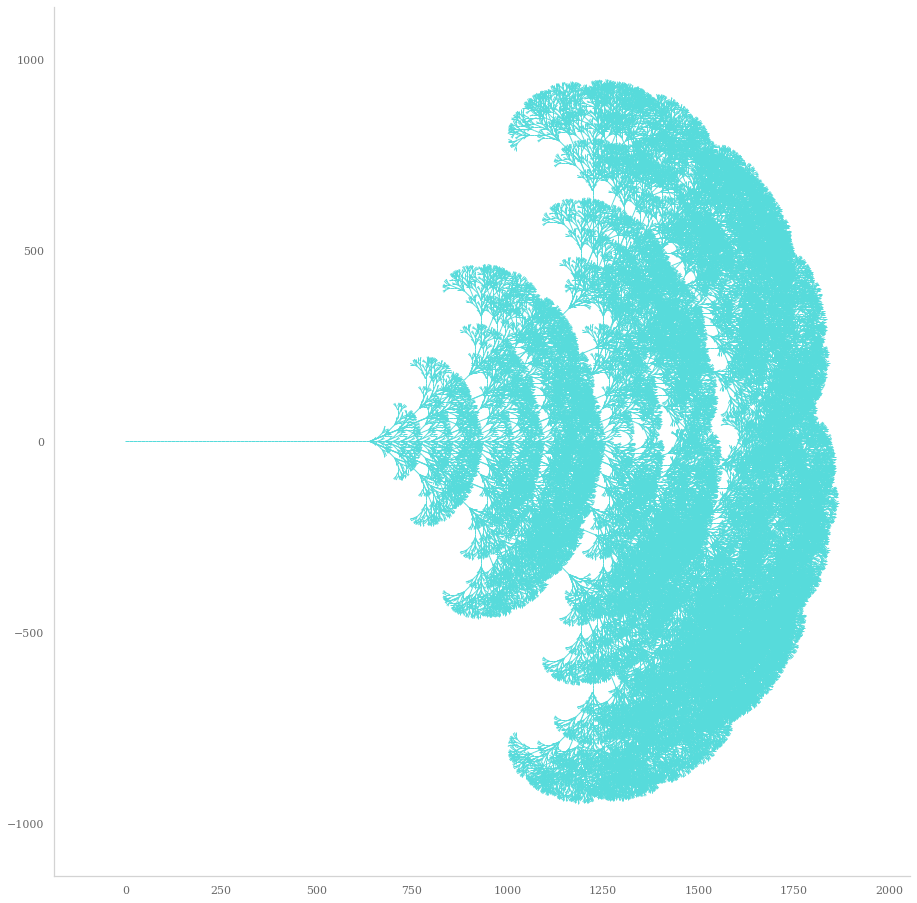

In [ ]:
system = System([{"f":"ff",
                  "g":"fg[-f[g]-g][g+g][+f[g]+g]"}], "g")

system.generate(6)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def minus(interpreter, sigma=22.5):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=22.5):
    interpreter.angle = (interpreter.angle-sigma)%360


def save(interpreter):
    interpreter.stack.append(interpreter.pos)
    interpreter.stack_angle.append(interpreter.angle)

def load(interpreter):

    interpreter.pos = interpreter.stack.pop(-1)
    interpreter.angle = interpreter.stack_angle.pop(-1)



interpreter = Interpreter({"f":f, "-":minus, "+":plus,"g":f, "[":save, "]":load})
interpreter.process(system.state)
interpreter.graph()
plt.gca().set_aspect('equal')

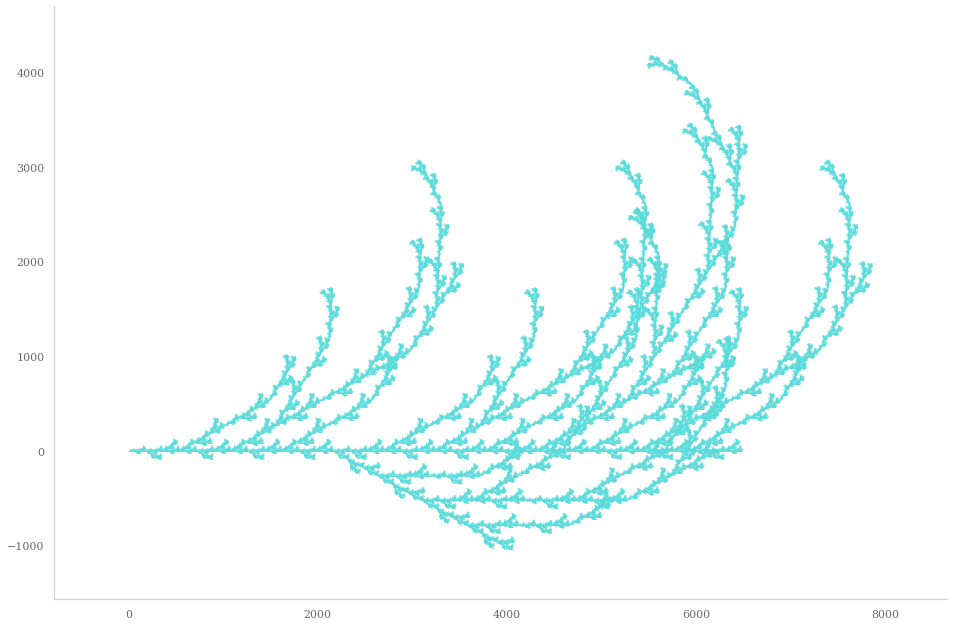

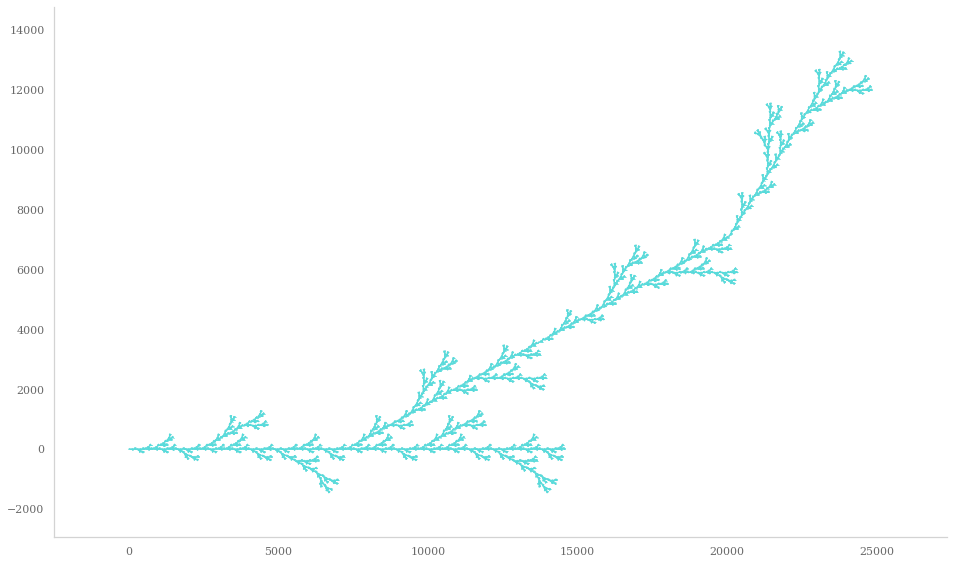

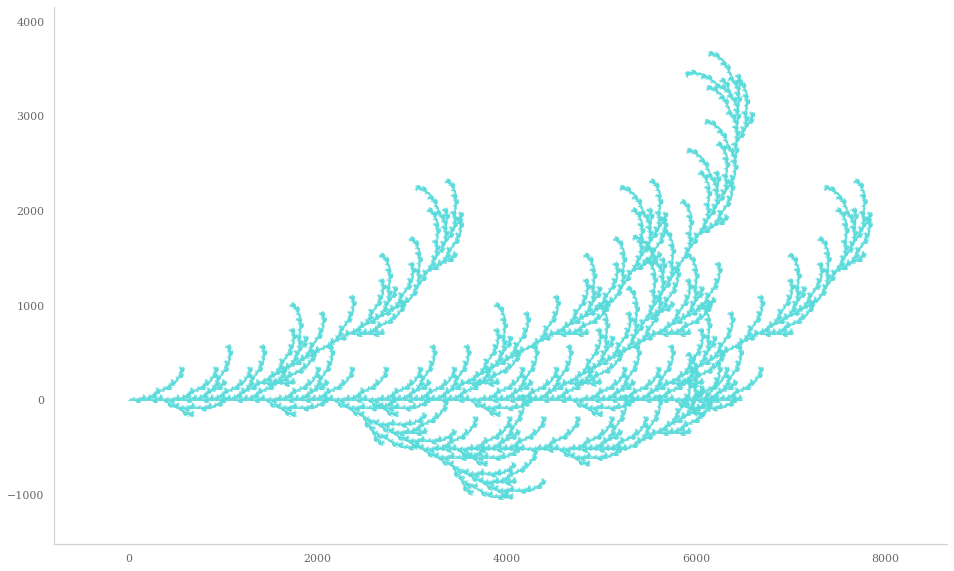

In [ ]:


def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def minus(interpreter, sigma=29):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=29):
    interpreter.angle = (interpreter.angle-sigma)%360

def save(interpreter):
    interpreter.stack.append(interpreter.pos)
    interpreter.stack_angle.append(interpreter.angle)

def load(interpreter):

    interpreter.pos = interpreter.stack.pop(-1)
    interpreter.angle = interpreter.stack_angle.pop(-1)

for i in range(3):
    system = System([{"f":"f[+f]f[-f]f",},
                 {"f":"f[-f]f[+f]f"},
                 {"f":"f[-ff-f]f"}], "f", weights=[1/3,1/3,1/3])

    system.generate(7)
    interpreter = Interpreter({"f":f, "-":minus, "+":plus,"g":f, "[":save, "]":load})
    interpreter.process(system.state)
    interpreter.graph()
    plt.gca().set_aspect('equal')

87511
graphing...


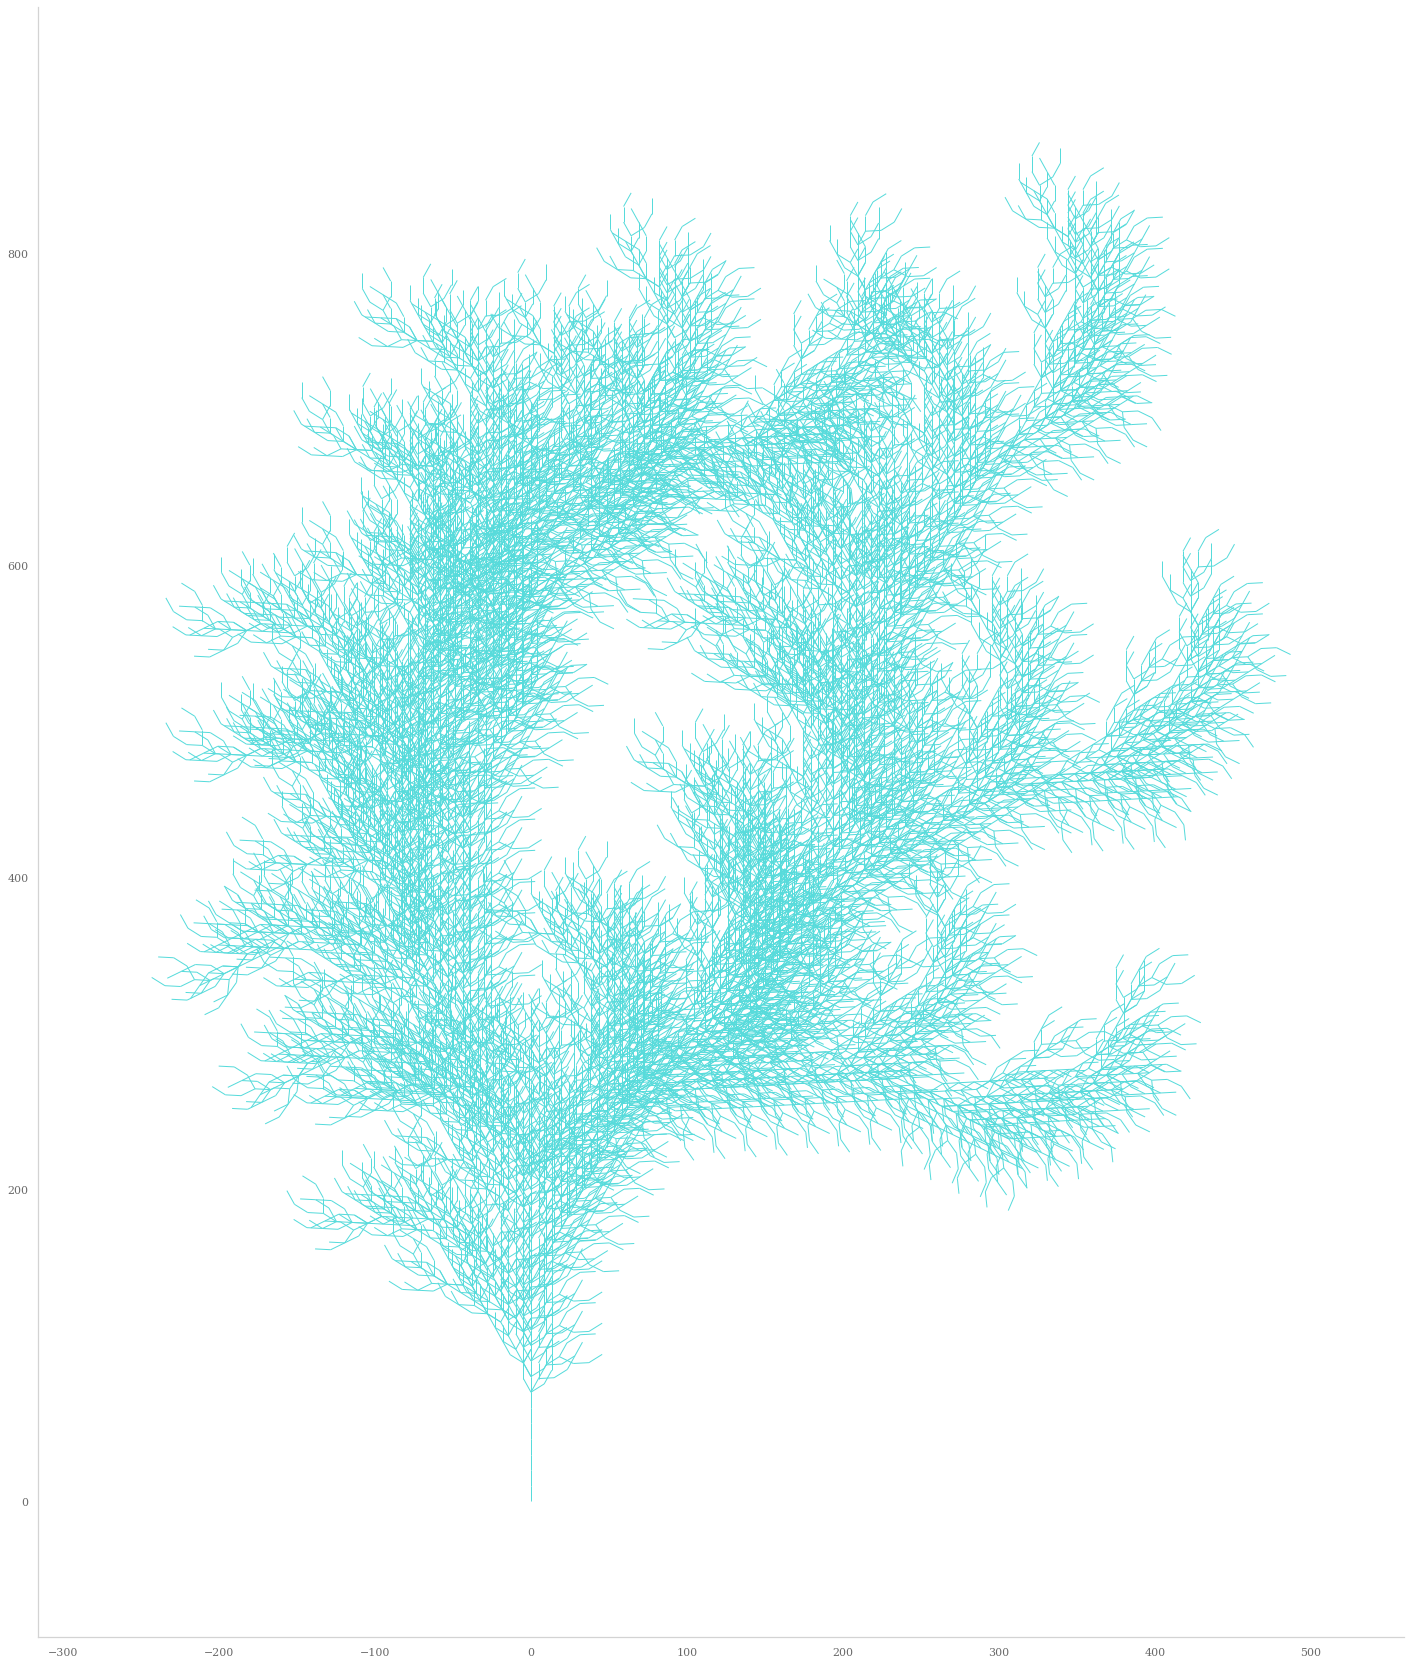

In [ ]:
system = System([{"f":"[f[-f][+f][g][-f][+f]]f",
                 },
                 {"f":"f+[+f-f-f]-[-f+f+f]",
                  "g":"g"},
                 {"f":"f[-ff-f]f"},
                 {"f":"f[+ff+f]f"}], "ggggggf", weights=[0.1,0.5,0.2, 0.2])

system.generate(6)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def f_n(interpreter, dist=100):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)



def minus(interpreter, sigma=29):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=29):
    interpreter.angle = (interpreter.angle-sigma)%360

def save(interpreter):
    interpreter.stack.append(interpreter.pos)
    interpreter.stack_angle.append(interpreter.angle)

def load(interpreter):

    interpreter.pos = interpreter.stack.pop(-1)
    interpreter.angle = interpreter.stack_angle.pop(-1)

plt.rcParams["figure.figsize"] = (30,30)

interpreter = Interpreter({"f":f, "-":minus, "+":plus,"g":Interpreter.make(f, dist=10), "[":save, "]":load}, angle=90)

interpreter.process(system.state)
print("graphing...")
interpreter.graph()
plt.gca().set_aspect('equal')

379
graphing...


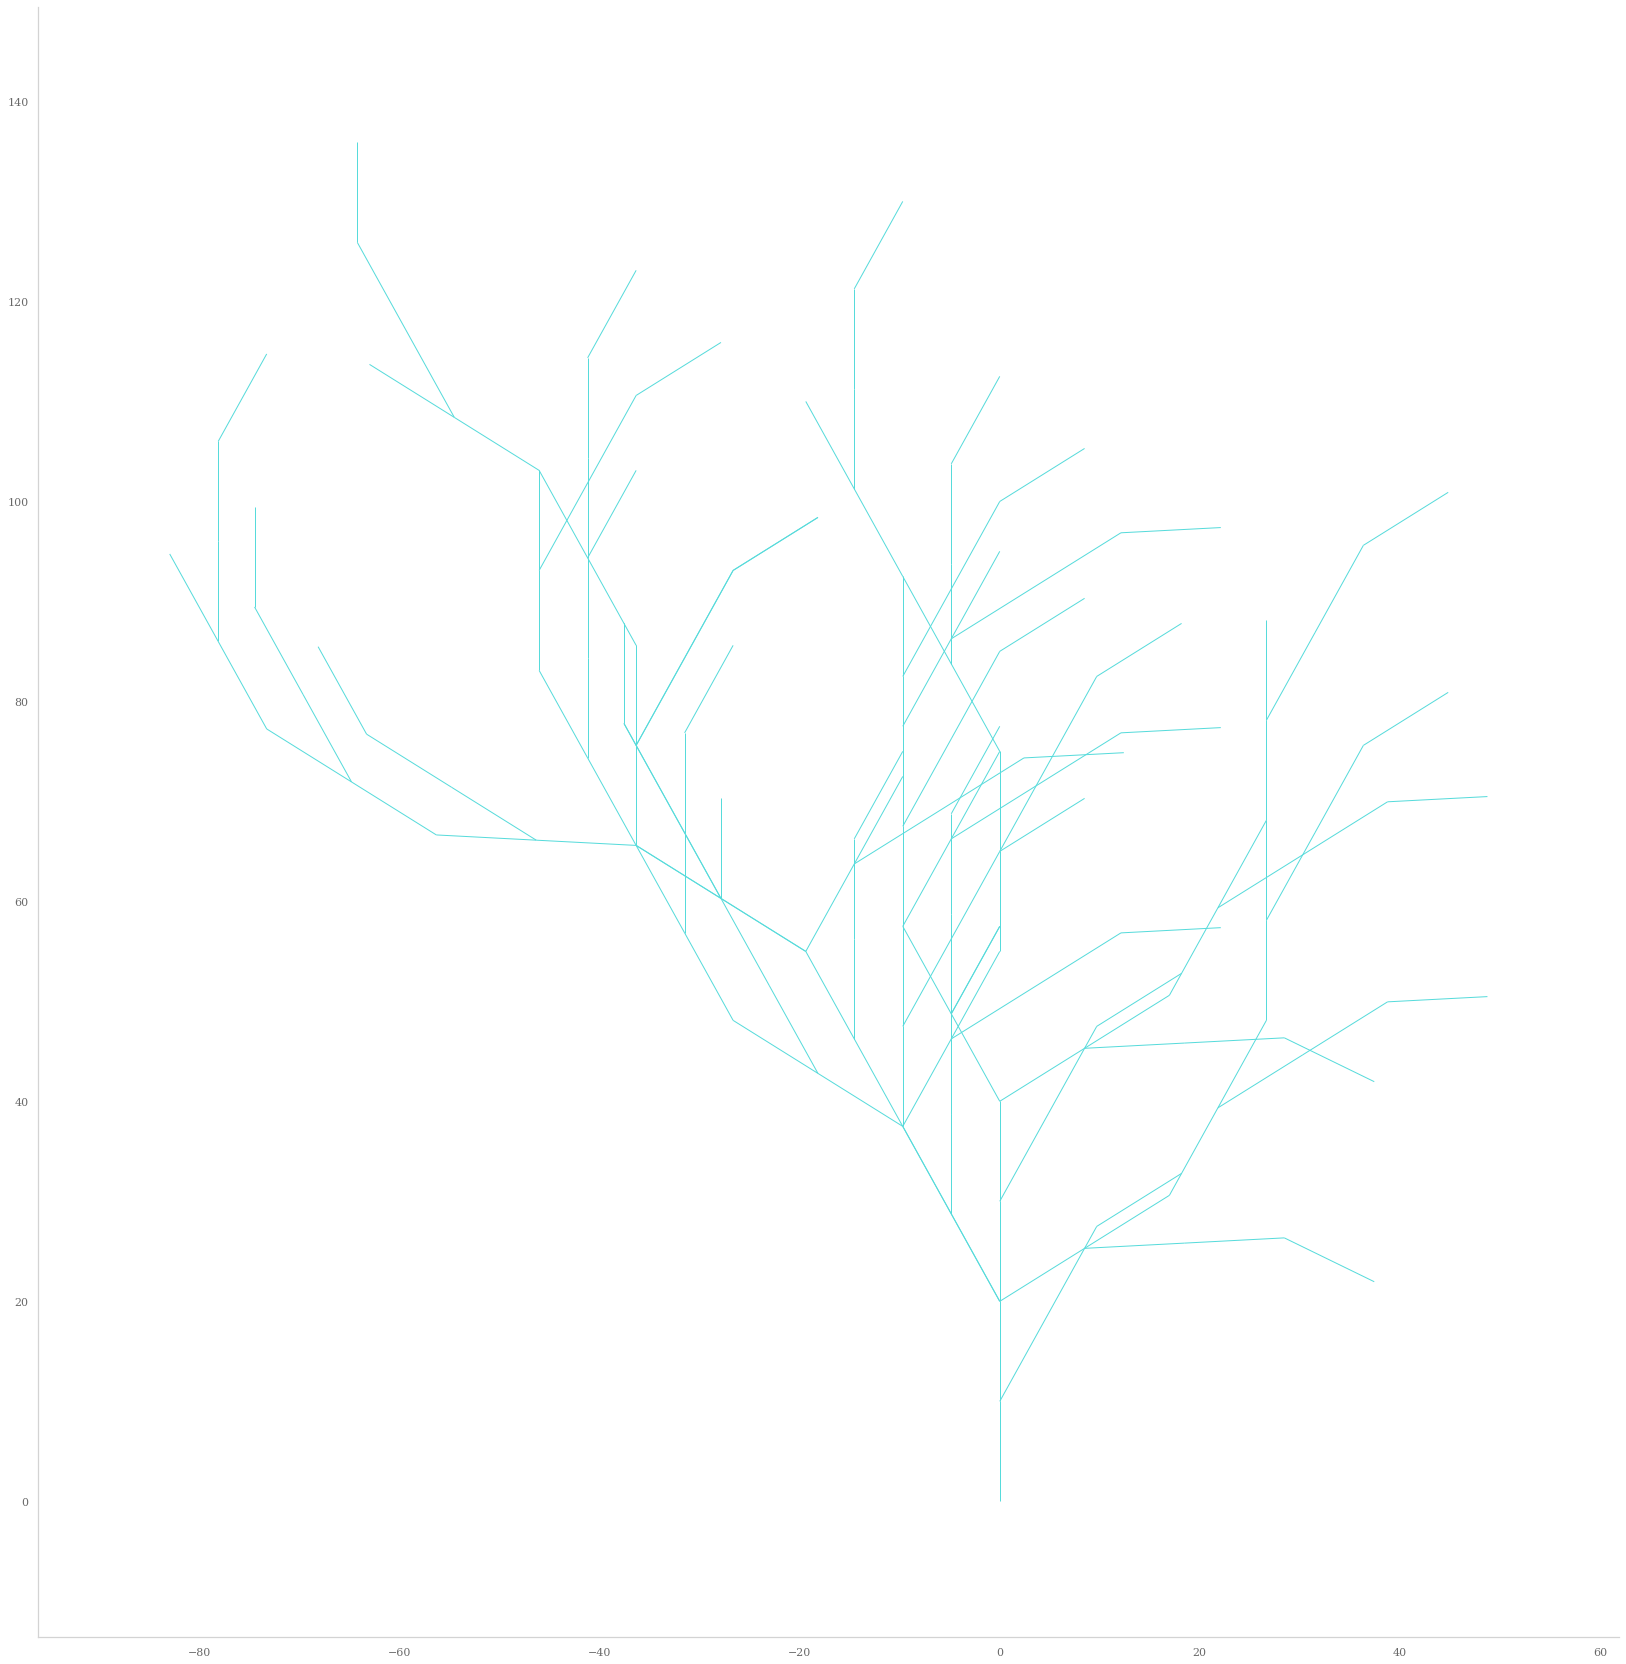

In [ ]:
system = System([{"f":"[f[-f][+f][-f][+f]]f",
                 },
                 {"f":"f+[+f-f-f]-[-f+f+f]"},
                 {"f":"f[-ff-f]f"},
                 {"f":"f[+ff+f]f"}], "f", weights=[0.1,0.5,0.2, 0.2])

system.generate(3)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def f_n(interpreter, dist=100):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)



def minus(interpreter, sigma=29):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=29):
    interpreter.angle = (interpreter.angle-sigma)%360

def save(interpreter):
    interpreter.stack.append(interpreter.pos)
    interpreter.stack_angle.append(interpreter.angle)

def load(interpreter):

    interpreter.pos = interpreter.stack.pop(-1)
    interpreter.angle = interpreter.stack_angle.pop(-1)

plt.rcParams["figure.figsize"] = (30,30)

interpreter = Interpreter({"f":f, "-":minus, "+":plus,"g":Interpreter.make(f, dist=10), "[":save, "]":load}, angle=90)

interpreter.process(system.state)
print("graphing...")
interpreter.graph()
plt.gca().set_aspect('equal')

393926
graphing...


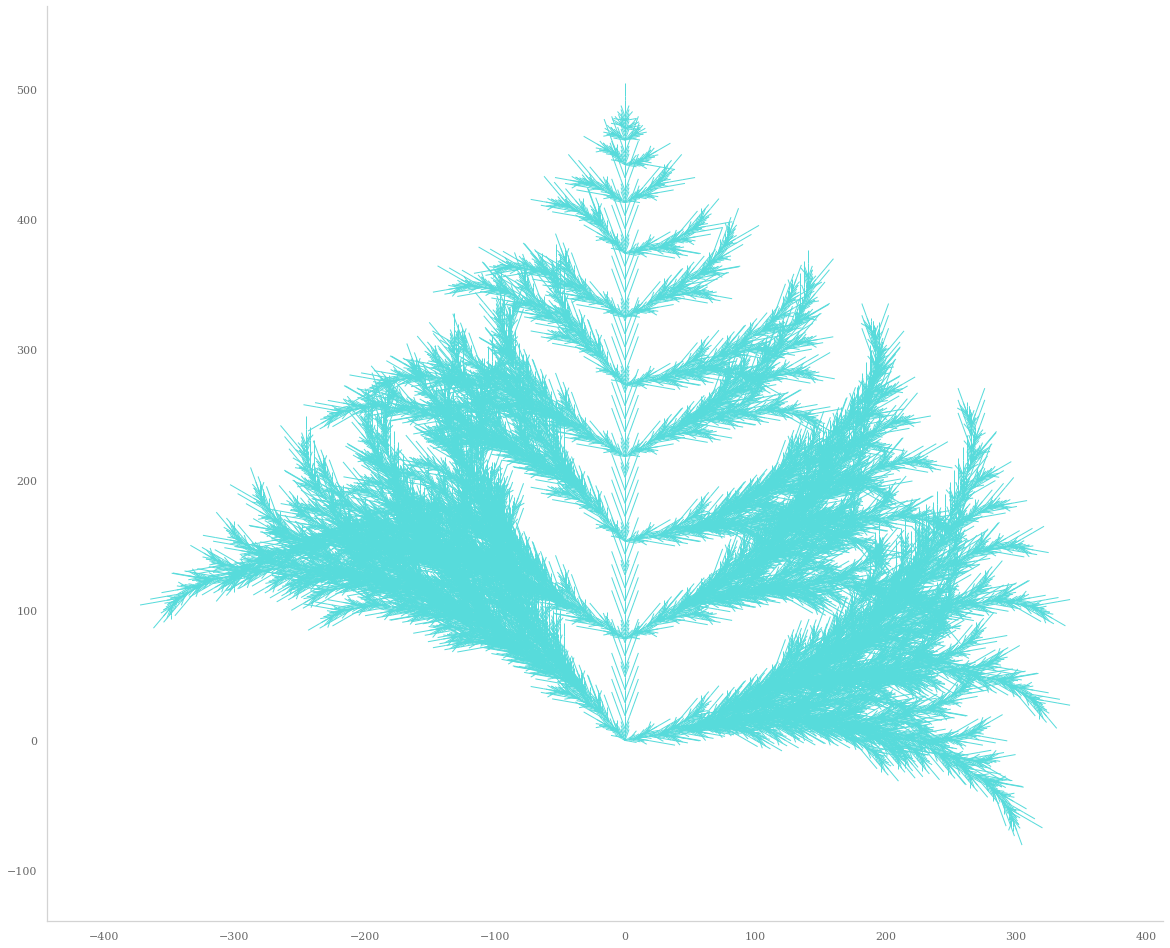

In [ ]:
system = System([{"v":"[+++w][---w]yv",
                  "w":"+x[-w]z",
                  "x":"-w[+x]z",
                  "y":"yz",
                  "z":"[-fff][+fff]f"},
                 {"v":"[+++w][---w]yv",
                  "w":"+x[-w]z",
                  "x":"-w[+x]z",
                  "y":"yz",
                  "z":"[-sss][+sss]s"},], "vzfsf", weights=[0.5,0.5])

system.generate(14)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def f_n(interpreter, dist=100):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)



def minus(interpreter, sigma=20):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=20):
    interpreter.angle = (interpreter.angle-sigma)%360

def save(interpreter):
    interpreter.stack.append(interpreter.pos)
    interpreter.stack_angle.append(interpreter.angle)

def load(interpreter):

    interpreter.pos = interpreter.stack.pop(-1)
    interpreter.angle = interpreter.stack_angle.pop(-1)

plt.rcParams["figure.figsize"] = (20,20)

interpreter = Interpreter({"f":f, "-":minus, "+":plus,"g":Interpreter.make(f, dist=10), "[":save, "]":load, 
                           "s":Interpreter.make(f, dist=3)}, angle=90)

interpreter.process(system.state)
print("graphing...")
interpreter.graph()
plt.gca().set_aspect('equal')

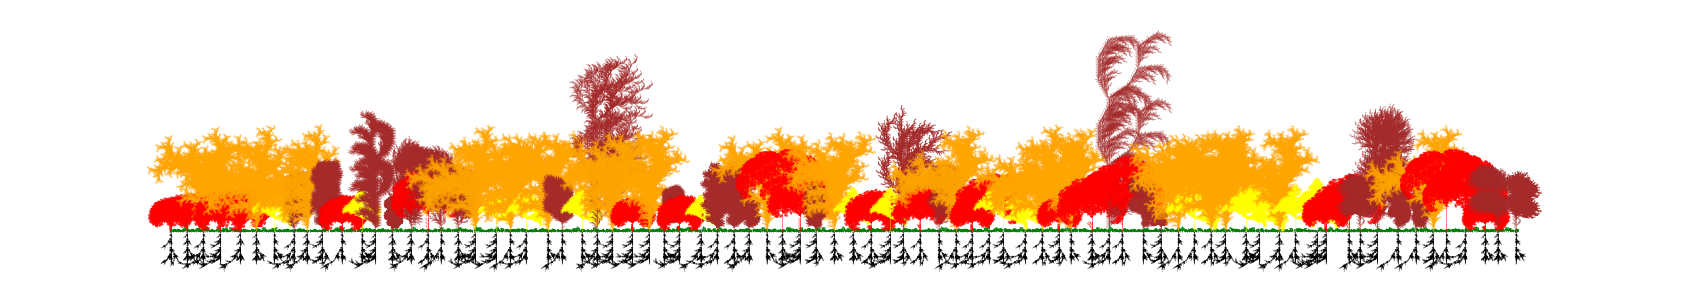

In [ ]:
def sum1(l):
    s = sum(l)
    return [i/s for i in l]


def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 
    interpreter.colors.append(interpreter.color)

def minus(interpreter, sigma=29.5):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=29.5):
    interpreter.angle = (interpreter.angle-sigma)%360
def f_n(interpreter, dist=100):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)
def rand_pos(interpreter, rng=1000):
    interpreter.pos = tuple(np.random.randint(-rng,rng,2))

def save(interpreter):
    interpreter.stack.append(interpreter.pos)
    interpreter.stack_angle.append(interpreter.angle)

def load(interpreter):
    try:
        interpreter.pos = interpreter.stack.pop(-1)
        interpreter.angle = interpreter.stack_angle.pop(-1)
    except:
        ...
def change_color(interpreter, color="r"):
    interpreter.color = color
plt.rcParams["figure.figsize"] = (30,30)


interpreter = Interpreter({"f":f, "-":minus, "+":plus,"g":Interpreter.make(f, dist=12), "[":save, "]":load,
                           "o":Interpreter.make(f, dist=15), "s":Interpreter.make(f, dist=3),
                           "N":Interpreter.make(rand_pos, rng=2000),
                           "R":Interpreter.make(change_color, color="r"),
                           "G":Interpreter.make(change_color, color="g"),
                           "B":Interpreter.make(change_color, color="b"),
                           "P":Interpreter.make(change_color, color="purple")}, angle=90)


tree1 =  System([{"f":"ff",
                  "g":"fg[-f[g]-g][g+g][+f[g]+g]"},
                 {"f":"f-[f]+[f]",
                  "g":"fg[-f[g]-g][g+g][+f[g]+g]"}], "g")

tree2 = System([{"f":"ff+[-f+f-f]-[-f-f-f]",
                  },
                {"f":"ff+[-f-f-f]-[+f-f+f]",
                  }], "f")
tree3 =  System([{"v":"[++w][--w]yv",
                  "w":"+x[-w]z",
                  "x":"-w[+x]z",
                  "y":"yz",
                  "z":"[-fff][+fff]f"},
                 {"v":"[++w][--w]yv",
                  "w":"+x[-w]z",
                  "x":"-w[+x]z",
                  "y":"yz",
                  "z":"[-sss][+sss]s"},], "gggggggggggggvzfsf", weights=[0.5,0.5])

tree4 = System([{"o":"[o[-o][+o][g][-o][+o]]o",
                 },
                 {"o":"o+[+o-o-o]-[-o+o+o]",
                  "g":"go"},
                 {"o":"o[-oo-o]o"},
                 {"o":"o[+oo+o]o"}], "ggoggo", weights=[0.1,0.5,0.2, 0.2])

grass1 =  System([{"s":"[s[-s][+s][-s][+s]]s",
                 },
                 {"s":"s+[+s-s-s]-[-s+s+s]"},
                 {"s":"s[-ss-s]s"},
                 {"s":"s[+ss+s]s"}], "s", weights=[0.1,0.5,0.2, 0.2])

root1 = System([{"x":"x+[ssx+xsss]-[ssx-sss]xssssssss",
                 },
                 {"x":"x-[ssx-sss]+[ssx+sss]xssssssss",
                 }], "x", weights=[0.5,0.5])


trees = [tree1, tree2, tree3, tree4]
iters = [5,5,12,5]
grass = [grass1]
roots = [root1]
colors = ["red","orange","yellow","brown","black"]
grass_colors = ["green"]
root_colors = ["black"]
pos = (0,0)
Ng = 600
N = 80
d = 15000
gspaces = np.linspace(0,d, Ng) + np.random.normal(0, d/(Ng*200), Ng)
spaces = np.linspace(0,d, N) + np.random.normal(0, d/(N*10), N)

for i in range(Ng):
    interpreter.angle = 90
    interpreter.pos = ( gspaces[i], 0 )
    n = np.random.choice(list(range(len(grass))))
    interpreter.color = grass_colors[n]
    interpreter.process(grass[n].gen_str(3))

for i in range(N):
    interpreter.angle = 90
    #interpreter.pos = ( np.random.uniform(0,3000), 0 )
    interpreter.pos = ( spaces[i], 0 )
    n = np.random.choice(list(range(len(trees))))
    interpreter.color = colors[n]
    interpreter.process(trees[n].gen_str(iters[n]))

for i in range(N):
    interpreter.angle = -90
    #interpreter.pos = ( np.random.uniform(0,3000), 0 )
    interpreter.pos = ( spaces[i], 0 )
    n = np.random.choice(list(range(len(roots))))
    interpreter.color = root_colors[n]
    interpreter.process(roots[n].gen_str(4))



interpreter.graph(colors=interpreter.colors, alpha=0.5)
plt.axis('off')
plt.gca().set_aspect('equal')

3906
graphing...


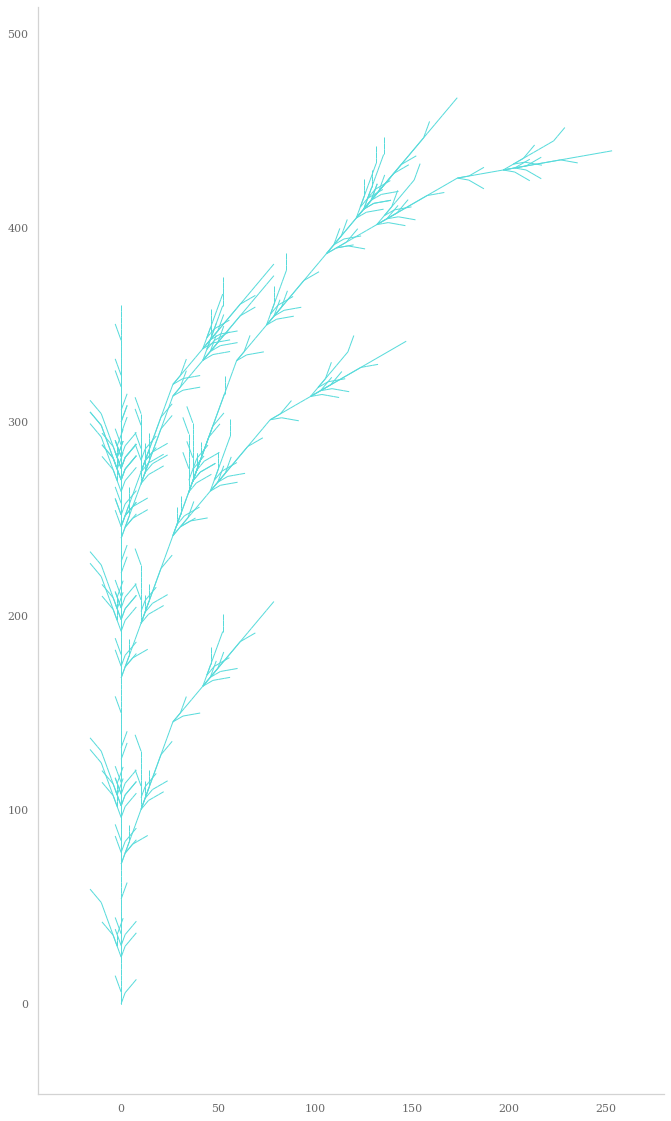

In [ ]:

system = System([{"x":"x+[ssx+xsss]-[ssx-sss]xssssssss",
                 },
                 {"x":"x-[ssx-sss]+[ssx+sss]xssssssss",
                 }], "x", weights=[0.5,0.5])

system.generate(4)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def f_n(interpreter, dist=100):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)



def minus(interpreter, sigma=20):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=20):
    interpreter.angle = (interpreter.angle-sigma)%360

def save(interpreter):
    interpreter.stack.append(interpreter.pos)
    interpreter.stack_angle.append(interpreter.angle)

def load(interpreter):

    interpreter.pos = interpreter.stack.pop(-1)
    interpreter.angle = interpreter.stack_angle.pop(-1)

plt.rcParams["figure.figsize"] = (20,20)

interpreter = Interpreter({"f":f, "-":minus, "+":plus,"g":Interpreter.make(f, dist=10), "[":save, "]":load, 
                           "s":Interpreter.make(f, dist=3)}, angle=90)

interpreter.process(system.state)
print("graphing...")
interpreter.graph()
plt.gca().set_aspect('equal')

43624
graphing...


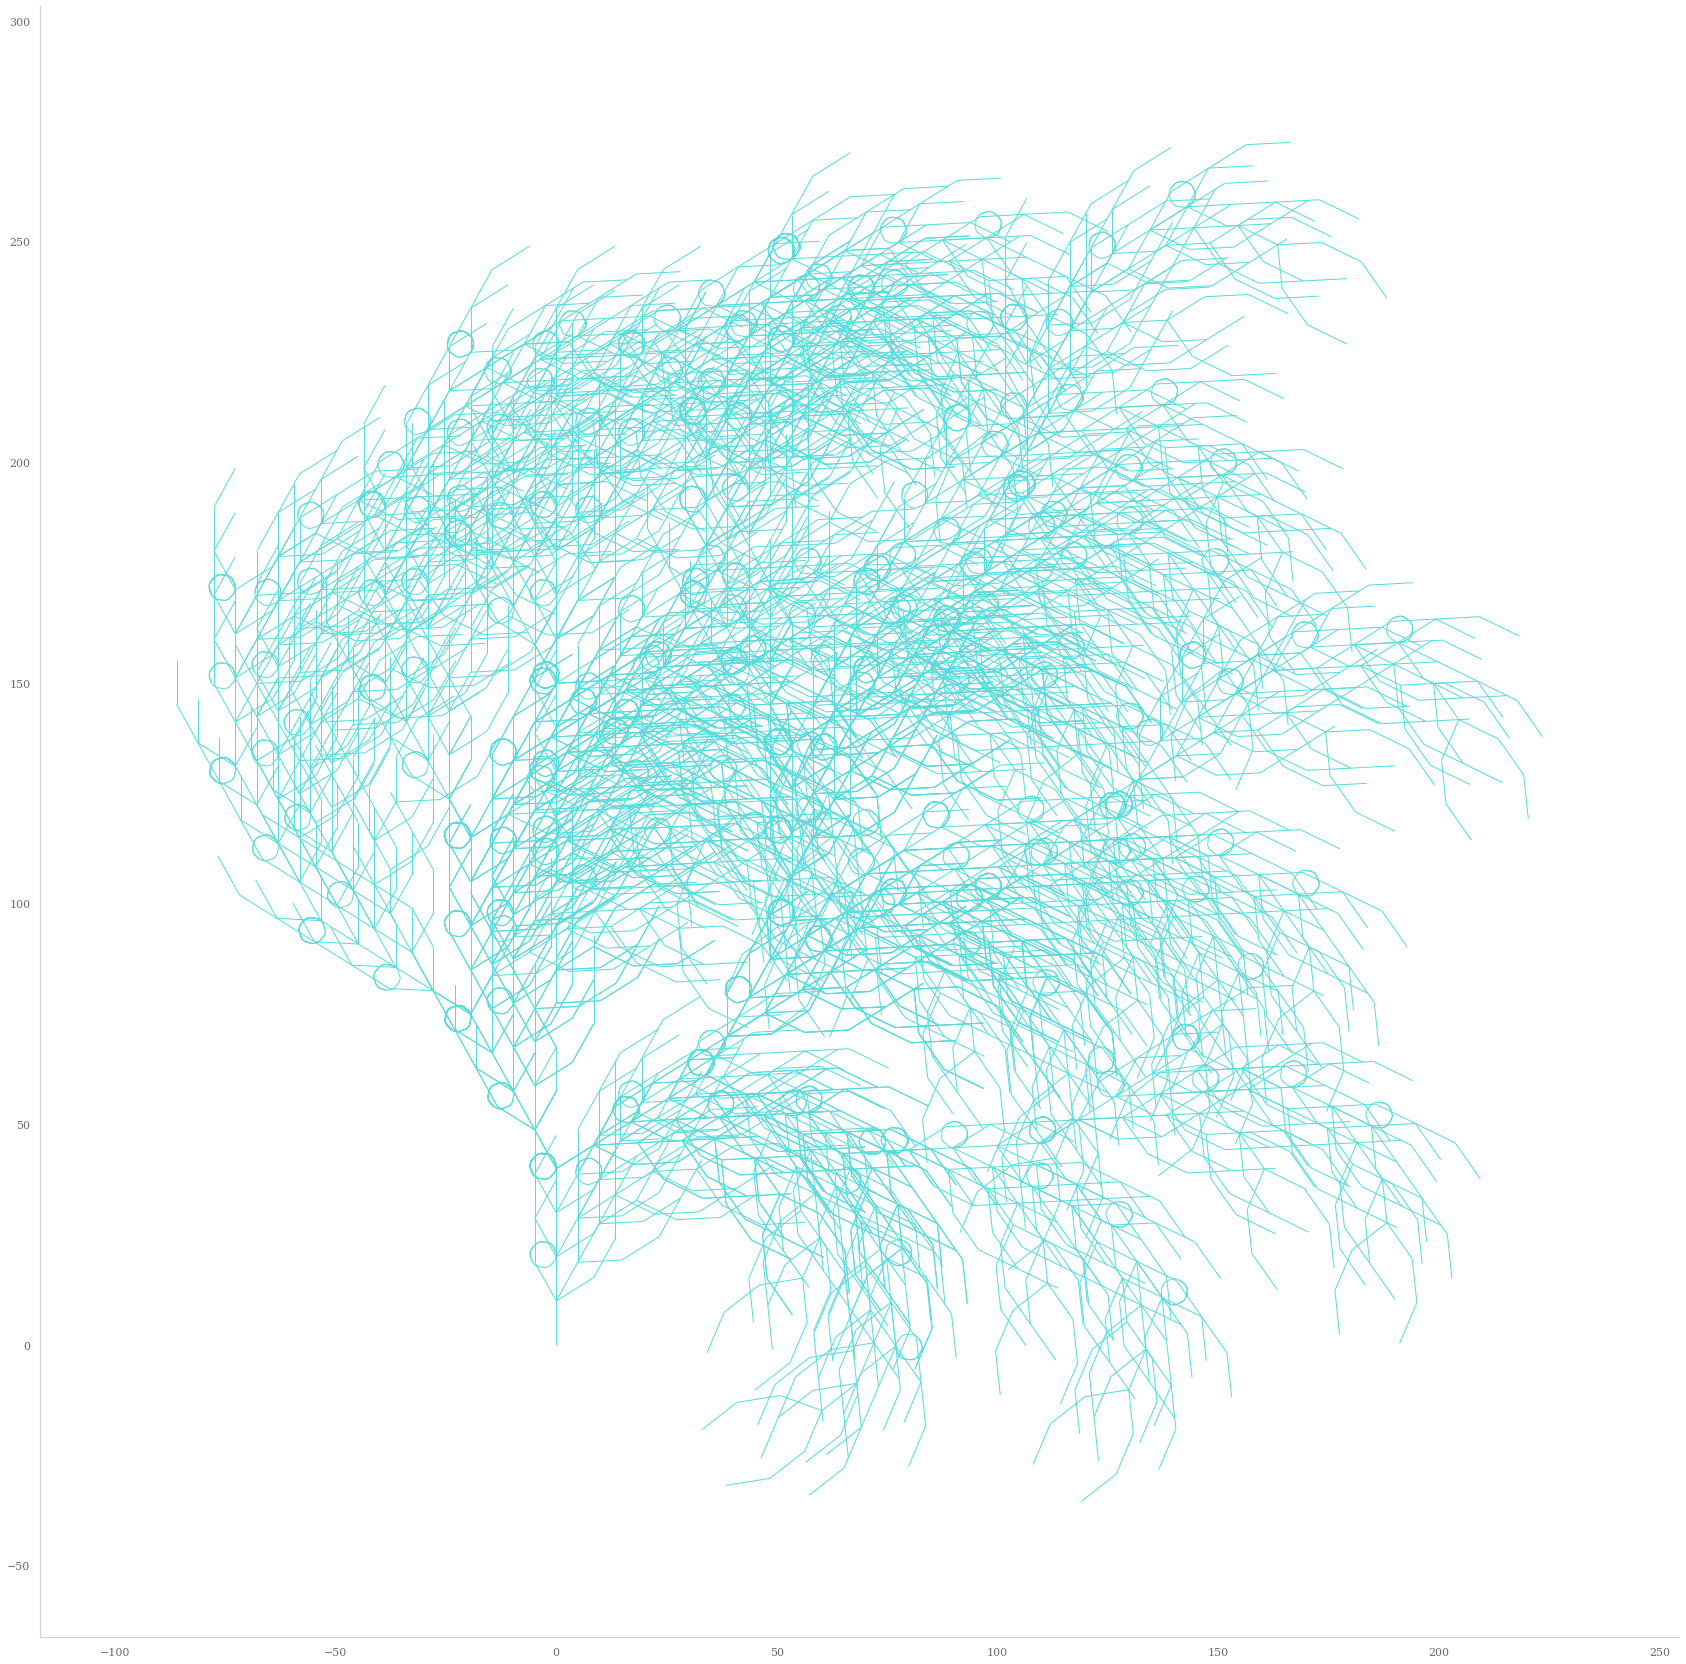

In [ ]:
system = System([{"f":"[f[-f][+f][-f][+f]]f[T]",
                 "T":"t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt"},
                 {"f":"f+[+f-f-f]-[-f+f+f][T]",
                   "T":"t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt"},
                 {"f":"f[-ff-f]f[T]",
                   "T":"t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt"},
                 {"f":"f[+ff+f]f[T]",
                   "T":"t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt-t-tt"}], "f", weights=[0.1,0.5,0.2, 0.2])

system.generate(5)
print(len(system.state))

def f(interpreter, dist=10):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)

    interpreter.lines.append((t, interpreter.pos)) 

def f_n(interpreter, dist=100):
    t = interpreter.pos
    interpreter.pos = (interpreter.pos[0]+np.cos(np.radians(interpreter.angle))*dist, interpreter.pos[1]+np.sin(np.radians(interpreter.angle))*dist)



def minus(interpreter, sigma=29):
    interpreter.angle = (interpreter.angle+sigma)%360
    
def plus(interpreter, sigma=29):
    interpreter.angle = (interpreter.angle-sigma)%360

def save(interpreter):
    interpreter.stack.append(interpreter.pos)
    interpreter.stack_angle.append(interpreter.angle)

def load(interpreter):

    interpreter.pos = interpreter.stack.pop(-1)
    interpreter.angle = interpreter.stack_angle.pop(-1)

plt.rcParams["figure.figsize"] = (30,30)

interpreter = Interpreter({"f":f, "-":minus, "+":plus,"g":Interpreter.make(f, dist=10), "[":save, "]":load,
                           "t":Interpreter.make(f, dist=1)}, angle=90)

interpreter.process(system.state)
print("graphing...")
interpreter.graph()
plt.gca().set_aspect('equal')